## **Import Libraries and modules**

In [0]:
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


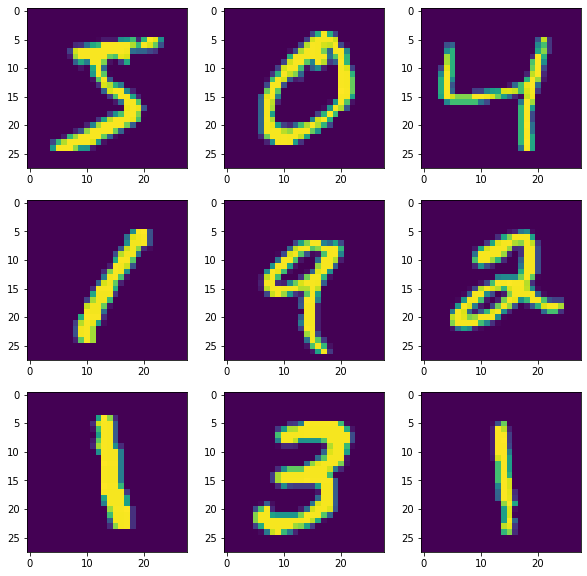

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape((28,28)))
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, (3, 3),activation='relu', input_shape=(28,28,1)))  #26
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(10, (5, 5)))

model.add(Flatten())
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          16010     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 7s 113us/step - loss: 0.2480 - acc: 0.9281
Epoch 2/15
60000/60000 [==============================] - 6s 102us/step - loss: 0.0635 - acc: 0.9803
Epoch 3/15
60000/60000 [==============================] - 6s 101us/step - loss: 0.0467 - acc: 0.9856
Epoch 4/15
60000/60000 [==============================] - 6s 99us/step - loss: 0.0381 - acc: 0.9886
Epoch 5/15
60000/60000 [==============================] - 6s 97us/step - loss: 0.0304 - acc: 0.9904
Epoch 6/15
60000/60000 [==============================] - 6s 99us/step - loss: 0.0271 - acc: 0.9913
Epoch 7/15
60000/60000 [==============================] - 6s 98us/step - loss: 0.0230 - acc: 0.9928
Epoch 8/15
60000/60000 [==============================] - 6s 97us/step - loss: 0.0192 - acc: 0.9940
Epoch 9/15
60000/60000 [==============================] - 6s 98us/step - loss: 0.0165 - acc: 0.9947
Epoch 10/15
60000/60000 [==============================] - 6s 99us/step - loss: 0.0141 - acc: 0.9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.03138630627401908, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[1.7677599e-12 1.0361406e-16 1.9607894e-08 1.2088572e-09 3.8105539e-18
  7.0958891e-13 4.8480630e-22 1.0000000e+00 8.7930965e-12 8.6268481e-10]
 [3.0442676e-11 1.9950681e-10 1.0000000e+00 5.6852110e-17 3.7863310e-16
  9.3023165e-21 3.7824160e-10 3.6902211e-16 2.3258638e-11 3.6384798e-13]
 [5.9545768e-10 9.9999511e-01 7.3197519e-08 7.1045558e-11 1.4180274e-06
  3.8074801e-09 1.1129347e-09 2.8287789e-06 4.4041147e-07 4.0044259e-08]
 [9.9999845e-01 3.7445637e-19 4.4473021e-09 6.8755604e-15 8.7973852e-14
  7.4403325e-13 1.5889719e-06 9.0573712e-12 1.2660699e-09 2.4697636e-10]
 [1.3766552e-14 4.7387485e-14 7.1060697e-14 2.1622070e-15 9.9999988e-01
  2.0798870e-14 1.1194182e-13 1.3381065e-12 1.7834248e-10 9.7037464e-08]
 [1.0398370e-09 9.9999464e-01 7.1576056e-09 1.8625177e-12 8.5699310e-07
  2.1125239e-11 3.4775480e-10 4.3117830e-06 2.0295087e-07 3.0746467e-08]
 [6.6795451e-18 1.3098924e-11 4.9583026e-13 2.6101979e-16 9.9998450e-01
  4.9478404e-11 1.0472423e-17 3.2718294e-13 1.5346024e-05 